In [14]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is 
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [15]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [16]:
X = np.load('smiley_X.npy')

In [17]:
X

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [1.],
         ...,
         [1.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [1.],
         ...,
         [1.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [18]:
y = np.load('smiley_y.npy')

In [19]:
y

array([0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1.])

In [20]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)

In [21]:
X = X.reshape(144,81)

In [22]:
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

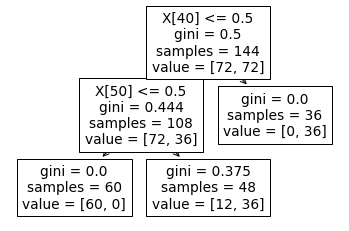

In [23]:
plot_tree(tree_clf);

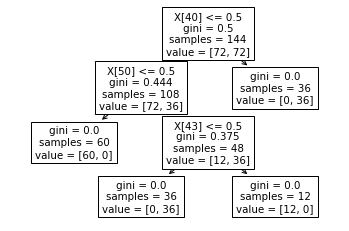

In [24]:
tree_clfd3 = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clfd3.fit(X, y)
plot_tree(tree_clfd3);

In [25]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [26]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

ValueError: X has 2 features, but DecisionTreeClassifier is expecting 81 features as input.

<Figure size 576x288 with 0 Axes>

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2, random_state=2021)
print('done')

done


In [28]:
X_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [29]:
print(np.shape(X_train))
print(np.shape(Y_train))
print(np.shape(X_test))
print(np.shape(Y_test))

(115, 81)
(115,)
(29, 81)
(29,)


In [30]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(random_state=2021)

In [31]:
search_space = {
    "n_estimators": [100,200],
    "max_depth": [2,3],
    "gamma": [0.01,0.1],
    "learning_rate": [0.001, 0.01, 0.1, 1]
}

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
GS = GridSearchCV(estimator = xgb_model,
                 param_grid = search_space,
                 scoring = ["r2", "neg_root_mean_squared_error"],
                 refit = "r2",
                 cv=5,
                 verbose=4)

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2, random_state=2021)

In [35]:
GS.fit(X_train, Y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END gamma=0.01, learning_rate=0.001, max_depth=2, n_estimators=100; neg_root_mean_squared_error: (test=-0.469) r2: (test=0.106) total time=   0.1s
[CV 2/5] END gamma=0.01, learning_rate=0.001, max_depth=2, n_estimators=100; neg_root_mean_squared_error: (test=-0.465) r2: (test=0.092) total time=   0.0s
[CV 3/5] END gamma=0.01, learning_rate=0.001, max_depth=2, n_estimators=100; neg_root_mean_squared_error: (test=-0.462) r2: (test=0.130) total time=   0.0s
[CV 4/5] END gamma=0.01, learning_rate=0.001, max_depth=2, n_estimators=100; neg_root_mean_squared_error: (test=-0.473) r2: (test=0.014) total time=   0.0s
[CV 5/5] END gamma=0.01, learning_rate=0.001, max_depth=2, n_estimators=100; neg_root_mean_squared_error: (test=-0.472) r2: (test=0.093) total time=   0.0s
[CV 1/5] END gamma=0.01, learning_rate=0.001, max_depth=2, n_estimators=200; neg_root_mean_squared_error: (test=-0.441) r2: (test=0.208) total time=   0.0s
[C

[CV 1/5] END gamma=0.01, learning_rate=0.1, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-0.018) r2: (test=0.999) total time=   0.1s
[CV 2/5] END gamma=0.01, learning_rate=0.1, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-0.018) r2: (test=0.999) total time=   0.0s
[CV 3/5] END gamma=0.01, learning_rate=0.1, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-0.016) r2: (test=0.999) total time=   0.0s
[CV 4/5] END gamma=0.01, learning_rate=0.1, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-0.018) r2: (test=0.999) total time=   0.0s
[CV 5/5] END gamma=0.01, learning_rate=0.1, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-0.018) r2: (test=0.999) total time=   0.1s
[CV 1/5] END gamma=0.01, learning_rate=1, max_depth=2, n_estimators=100; neg_root_mean_squared_error: (test=-0.013) r2: (test=0.999) total time=   0.0s
[CV 2/5] END gamma=0.01, learning_rate=1, max_depth=2, n_estimators=100; neg_r

[CV 3/5] END gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-0.189) r2: (test=0.854) total time=   0.0s
[CV 4/5] END gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-0.194) r2: (test=0.834) total time=   0.0s
[CV 5/5] END gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-0.192) r2: (test=0.850) total time=   0.0s
[CV 1/5] END gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-0.073) r2: (test=0.978) total time=   0.1s
[CV 2/5] END gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-0.073) r2: (test=0.978) total time=   0.1s
[CV 3/5] END gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-0.072) r2: (test=0.979) total time=   0.1s
[CV 4/5] END gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=200; n

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=Non

In [36]:
print(GS.best_estimator_)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.01, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=1, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=2021, ...)


In [37]:
GS.best_params_

{'gamma': 0.01, 'learning_rate': 1, 'max_depth': 3, 'n_estimators': 100}

In [38]:
GS.best_score_

0.9996677310669713

In [ ]:
import pandas as pd
import numpy as np
df = pd.DataFrame(GS.cv_results_)
df = df.sort_values("rank_test_r2")
df.to_csv("cv_results.csv")

In [ ]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=0)
tree_clf.fit(X, y)
plot_tree(tree_clf);

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=5)
print(scores)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=10)
print(scores)

In [ ]:
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X,y, test_size=0.3, random_state=2021)
X6_train, X6_test, Y6_train, Y6_test = train_test_split(X,y, test_size=0.6, random_state=2021)

In [ ]:
print(np.shape(X3_train))
print(np.shape(Y3_train))
print(np.shape(X3_test))
print(np.shape(Y3_test))

In [ ]:
print(np.shape(X6_train))
print(np.shape(Y6_train))
print(np.shape(X6_test))
print(np.shape(Y6_test))

In [ ]:
GS30 = GridSearchCV(estimator = xgb_model,
                 param_grid = search_space,
                 scoring = ["r2", "neg_root_mean_squared_error"],
                 refit = "r2",
                 cv=5,
                 verbose=4)

In [ ]:
GS60 = GridSearchCV(estimator = xgb_model,
                 param_grid = search_space,
                 scoring = ["r2", "neg_root_mean_squared_error"],
                 refit = "r2",
                 cv=5,
                 verbose=4)

In [ ]:
GS30.fit(X3_train, Y3_train)

In [ ]:
GS.best_params_

In [ ]:
GS.best_score_

In [ ]:
GS60.fit(X6_train, Y6_train)

In [ ]:
GS60.best_params_

In [ ]:
GS60.best_score_

In [ ]:
GS2010 = GridSearchCV(estimator = xgb_model,
                 param_grid = search_space,
                 scoring = ["r2", "neg_root_mean_squared_error"],
                 refit = "r2",
                 cv=10,
                 verbose=4)

In [ ]:
GS2010.fit(X_train, Y_train)

In [ ]:
GS2010.best_params_

In [ ]:
GS.best_score_

In [ ]:
#pred = tree.predict(X_test)
plot_tree(tree_clf)

In [ ]:
tree_predit = tree_clf.predict(X_test)

In [55]:
import numpy as np
import pandas as pd
import csv
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection  import train_test_split, KFold, StratifiedKFold, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score, precision_recall_curve, roc_curve, roc_auc_score, RocCurveDisplay, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

In [ ]:
tree_predit = tree_clf.predict(X_test)
tree_accuracy = accuracy_score(Y_test, tree_predit)
tree_f1 = f1_score(Y_test, tree_predit)
tree_precision = precision_score(Y_test, tree_predit)
tree_recall = recall_score(Y_test, tree_predit)
tree_cm = confusion_matrix(Y_test, tree_predit)

print("Accuracy:", tree_accuracy)
print("F1 Score: ", tree_f1)
print("Precision Score: ", tree_precision)
print("Recall Score: ", tree_recall)

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = tree_cm, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
parameters = {
    'criterion':["gini","entropy"],  # Can also include "log_loss"
    'max_depth':[1,2,3,4,5],
    'min_samples_split':[2,3,4,5],
    'min_samples_leaf':[1,2,3,4,5],
    'min_weight_fraction_leaf':[0.0,0.1,0.2,0.3,0.4],
    'max_features':[1,2,3,4,5]
}

dtc = DecisionTreeClassifier()
search = GridSearchCV(estimator = dtc, 
                      param_grid = parameters,
                      scoring = ["accuracy", "f1", "precision", "recall", "roc_auc"],
                      refit = "accuracy",
                      cv = 10,
                      # verbose = 4
                     )

search.fit(X_train, Y_train);
print("done")

In [ ]:
print(search.best_estimator_)

In [ ]:
print(search.best_params_)

In [ ]:
parameters1 = {
    'criterion':["gini"],  # Can also include "log_loss"
    'max_depth':[5],
    'min_samples_split':[2],
    'min_samples_leaf':[2],
    'min_weight_fraction_leaf':[0.0],
    'max_features':[5]
}

dtc = DecisionTreeClassifier()
search1 = GridSearchCV(estimator = dtc, 
                      param_grid = parameters1,
                      scoring = ["accuracy", "f1", "precision", "recall", "roc_auc"],
                      refit = "accuracy",
                      cv = 10,
                      # verbose = 4
                     )

search.fit(X_train, Y_train);
print("done")

In [ ]:
search1.fit(X_train, Y_train);
print("done")

In [ ]:
print(search1.best_estimator_)

In [ ]:
print(search.best_score_)

In [ ]:
print(search1.best_score_)

In [ ]:
# TP-[0,0] FN-[0,1] 
# FP-[1,0] TN-[1,1]
#Sensitivity = TP/(TP+FN)
#Specificity = TN/(TN+FP)
#Precision precision=TP/(TP+FP)
#Recall recall =TP/(TP+FN)
#F-measure =( 2 × recall × precision) / (recall+precision)

In [ ]:
GS30.best_score_

In [ ]:
search30 = GridSearchCV(estimator = dtc, 
                      param_grid = parameters1,
                      scoring = ["accuracy", "f1", "precision", "recall", "roc_auc"],
                      refit = "accuracy",
                      cv = 10,
                      # verbose = 4
                     )

search30.fit(X3_train, Y3_train);
print("done")

In [ ]:
print(search30.best_score_)

In [ ]:
search60 = GridSearchCV(estimator = dtc, 
                      param_grid = parameters1,
                      scoring = ["accuracy", "f1", "precision", "recall", "roc_auc"],
                      refit = "accuracy",
                      cv = 10,
                      # verbose = 4
                     )

search60.fit(X6_train, Y6_train);
print("done")

In [ ]:
print(search60.best_score_)

In [ ]:
#tree_clf30 = DecisionTreeClassifier(max_depth=2, random_state=0)
tree_clf30 = DecisionTreeClassifier(max_depth=5, max_features=5, min_samples_leaf=2)
tree_clf30.fit(X3_train, Y3_train)
plot_tree(tree_clf30);

In [ ]:
#tree_clf60 = DecisionTreeClassifier(max_depth=2, random_state=0)
tree_clf60 = DecisionTreeClassifier(max_depth=5, max_features=5, min_samples_leaf=2)
tree_clf60.fit(X6_train, Y6_train)
plot_tree(tree_clf60);

In [ ]:
tree_predit30 = tree_clf30.predict(X3_test)

In [ ]:
tree_predit30 = tree_clf30.predict(X3_test)
tree_accuracy = accuracy_score(Y3_test, tree_predit30)
tree_f1 = f1_score(Y3_test, tree_predit30)
tree_precision = precision_score(Y3_test, tree_predit30)
tree_recall = recall_score(Y3_test, tree_predit30)
tree_cm = confusion_matrix(Y3_test, tree_predit30)

print("Accuracy:", tree_accuracy)
print("F1 Score: ", tree_f1)
print("Precision Score: ", tree_precision)
print("Recall Score: ", tree_recall)

In [ ]:
tree_predit60 = tree_clf60.predict(X6_test)
tree_accuracy = accuracy_score(Y6_test, tree_predit60)
tree_f1 = f1_score(Y6_test, tree_predit60)
tree_precision = precision_score(Y6_test, tree_predit60)
tree_recall = recall_score(Y6_test, tree_predit60)
tree_cm = confusion_matrix(Y6_test, tree_predit60)

print("Accuracy:", tree_accuracy)
print("F1 Score: ", tree_f1)
print("Precision Score: ", tree_precision)
print("Recall Score: ", tree_recall)

In [ ]:
#'criterion': 'gini', 
#'max_depth': 5, 
#'max_features': 5, 
#'min_samples_leaf': 2, 
#'min_samples_split': 2, 
#'min_weight_fraction_leaf': 0.
#(max_depth=5, max_features=5, min_samples_leaf=2)

#tree_clf.fit(X, y)
#tree_predit = tree_clf.predict(X_test)
#tree_accuracy = accuracy_score(Y_test, tree_predit)
#tree_f1 = f1_score(Y_test, tree_predit60)
#tree_precision = precision_score(Y6_test, tree_predit60)
#tree_recall = recall_score(Y6_test, tree_predit60)
#tree_cm = confusion_matrix(Y6_test, tree_predit60)

#print("Accuracy:", tree_accuracy)
#print("F1 Score: ", tree_f1)
#print("Precision Score: ", tree_precision)
#print("Recall Score: ", tree_recall)

In [ ]:
#X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2, random_state=2021)
tree_clftrain = DecisionTreeClassifier(max_depth=5, max_features=5, min_samples_leaf=2)
tree_clftrain.fit(X_train, Y_train)
plot_tree(tree_clftrain);

tree_predit_train = tree_clftrain.predict(X_test)
tree_accuracy = accuracy_score(Y_test, tree_predit_train)
tree_f1 = f1_score(Y_test, tree_predit_train)
tree_precision = precision_score(Y_test, tree_predit_train)
tree_recall = recall_score(Y_test, tree_predit_train)
tree_cm = confusion_matrix(Y_test, tree_predit_train)

print("Accuracy:", tree_accuracy)
print("F1 Score: ", tree_f1)
print("Precision Score: ", tree_precision)
print("Recall Score: ", tree_recall)

In [ ]:
tree_clf30 = DecisionTreeClassifier(max_depth=5, max_features=5, min_samples_leaf=2)
tree_clf30.fit(X3_train, Y3_train)

plot_tree(tree_clf30);

tree_predit30 = tree_clf30.predict(X3_test)
tree_accuracy = accuracy_score(Y3_test, tree_predit30)
tree_f1 = f1_score(Y3_test, tree_predit30)
tree_precision = precision_score(Y3_test, tree_predit30)
tree_recall = recall_score(Y3_test, tree_predit30)
tree_cm = confusion_matrix(Y3_test, tree_predit30)

print("Accuracy:", tree_accuracy)
print("F1 Score: ", tree_f1)
print("Precision Score: ", tree_precision)
print("Recall Score: ", tree_recall)

In [ ]:
tree_clf60 = DecisionTreeClassifier(max_depth=5, max_features=5, min_samples_leaf=2)
tree_clf60.fit(X6_train, Y6_train)
plot_tree(tree_clf60);

tree_predit60 = tree_clf60.predict(X6_test)
tree_accuracy = accuracy_score(Y6_test, tree_predit60)
tree_f1 = f1_score(Y6_test, tree_predit60)
tree_precision = precision_score(Y6_test, tree_predit60)
tree_recall = recall_score(Y6_test, tree_predit60)
tree_cm = confusion_matrix(Y6_test, tree_predit60)

print("Accuracy:", tree_accuracy)
print("F1 Score: ", tree_f1)
print("Precision Score: ", tree_precision)
print("Recall Score: ", tree_recall)

In [ ]:
#'criterion': 'gini', 
#'max_depth': 5, 
#'max_features': 5, 
#'min_samples_leaf': 2, 
#'min_samples_split': 2, 
#'min_weight_fraction_leaf': 0.
#(max_depth=5, max_features=5, min_samples_leaf=2)
tree_clftrain = DecisionTreeClassifier(max_depth=5, max_features=5, min_samples_leaf=2,min_samples_split=2,min_weight_fraction_leaf=0,criterion='gini')

In [ ]:
tree_clftrain.fit(X_train, Y_train)
plot_tree(tree_clftrain);

In [ ]:
tree_clftrainbest = DecisionTreeClassifier(max_depth=5, max_features=5, min_samples_leaf=2,min_samples_split=2,min_weight_fraction_leaf=0,criterion='gini')
tree_clftrainbest.fit(X_train, Y_train)
plot_tree(tree_clftrainbest);

tree_predit_train_best = tree_clftrainbest.predict(X_test)
tree_accuracy = accuracy_score(Y_test, tree_predit_train_best)
tree_f1 = f1_score(Y_test, tree_predit_train_best)
tree_precision = precision_score(Y_test, tree_predit_train_best)
tree_recall = recall_score(Y_test, tree_predit_train_best)
tree_cm = confusion_matrix(Y_test, tree_predit_train_best)

print("Accuracy:", tree_accuracy)
print("F1 Score: ", tree_f1)
print("Precision Score: ", tree_precision)
print("Recall Score: ", tree_recall)



In [ ]:

tree_clf30 = DecisionTreeClassifier(max_depth=5, max_features=5, min_samples_leaf=2,min_samples_split=2,min_weight_fraction_leaf=0,criterion='gini')
#tree_clf30 = DecisionTreeClassifier(max_depth=5, max_features=5, min_samples_leaf=2)
tree_clf30.fit(X3_train, Y3_train)

plot_tree(tree_clf30);

tree_predit30 = tree_clf30.predict(X3_test)
tree_accuracy = accuracy_score(Y3_test, tree_predit30)
tree_f1 = f1_score(Y3_test, tree_predit30)
tree_precision = precision_score(Y3_test, tree_predit30)
tree_recall = recall_score(Y3_test, tree_predit30)
tree_cm = confusion_matrix(Y3_test, tree_predit30)

print("Accuracy:", tree_accuracy)
print("F1 Score: ", tree_f1)
print("Precision Score: ", tree_precision)
print("Recall Score: ", tree_recall)

In [ ]:
tree_clf60 = DecisionTreeClassifier(max_depth=5, max_features=5, min_samples_leaf=2,min_samples_split=2,min_weight_fraction_leaf=0,criterion='gini')
#tree_clf60 = DecisionTreeClassifier(max_depth=5, max_features=5, min_samples_leaf=2)
tree_clf60.fit(X6_train, Y6_train)
plot_tree(tree_clf60);

tree_predit60 = tree_clf60.predict(X6_test)
tree_accuracy = accuracy_score(Y6_test, tree_predit60)
tree_f1 = f1_score(Y6_test, tree_predit60)
tree_precision = precision_score(Y6_test, tree_predit60)
tree_recall = recall_score(Y6_test, tree_predit60)
tree_cm = confusion_matrix(Y6_test, tree_predit60)

print("Accuracy:", tree_accuracy)
print("F1 Score: ", tree_f1)
print("Precision Score: ", tree_precision)
print("Recall Score: ", tree_recall)

In [ ]:
def plot_search_results(gridseachcv):
    ## Results from grid search
    results = gridseachcv.cv_results_
    means_test = results['mean_test_accuracy']

    masks=[]
    masks_names= list(gridseachcv.best_params_.keys())
    for p_k, p_v in gridseachcv.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))
    params=gridseachcv.param_grid
    ## Ploting results
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
    fig.suptitle('Accuracy of Tree per Hyperparameter')
    fig.text(0.04, 0.5, 'Mean Accuracy', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        # e_1 = np.array(stds_test[best_index])
        # ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test')
        ax[i].errorbar(x, y_1, linestyle='--', marker='o', label='test')
        ax[i].set_xlabel(p.upper())
    plt.legend()
    plt.show()

    
plot_search_results(search)

In [ ]:
plot_search_results(search1)

Linear Regression - Lab 9

In [39]:
import numpy as np

Xn = 2 * np.random.rand(100, 1)
yn = 4 + 3 * Xn + np.random.randn(100, 1)

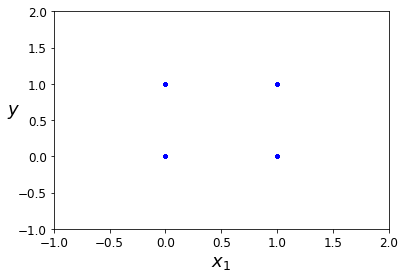

In [40]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-1, 2, -1, 2])
plt.show()

In [41]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(-73935280889354.42,
 array([ 3.11323819e-03, -1.28012710e+13, -3.05683642e+12, -2.67805324e+13,
         3.11222835e+13, -1.77010099e+13, -2.22889635e+13,  2.14683669e+13,
         1.46484375e-02, -4.14022603e+13, -2.79015459e+12,  1.64476798e+13,
         4.73400604e+12, -7.04071051e+12, -3.99517105e+11, -1.49927941e+13,
         1.00497910e+13, -2.14843750e-02, -1.85546875e-02,  1.72132843e+13,
         1.72132843e+13, -3.51562500e-02, -1.17187500e-02, -2.24858392e+13,
        -2.24858392e+13, -2.24858392e+13, -7.81250000e-03,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  6.41805903e+12,  5.04603697e+12,  4.49852679e+13,
         1.36756458e+13,  1.36756458e+13,  1.82523943e+12, -6.41805903e+12,
         0.00000000e+00,  0.00000000e+00, -7.44778434e+11, -7.14702096e+12,
         1.74078897e+13,  2.74643349e+13,  2.74643349e+13,  1.40182

In [42]:
X = np.load('smiley_X.npy')
X = X.reshape(144,81)
y = np.load('smiley_y.npy')

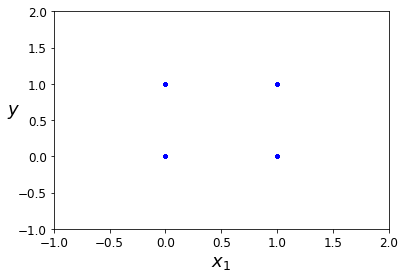

In [43]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-1, 2, -1, 2])
plt.show()

In [44]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(-73935280889354.42,
 array([ 3.11323819e-03, -1.28012710e+13, -3.05683642e+12, -2.67805324e+13,
         3.11222835e+13, -1.77010099e+13, -2.22889635e+13,  2.14683669e+13,
         1.46484375e-02, -4.14022603e+13, -2.79015459e+12,  1.64476798e+13,
         4.73400604e+12, -7.04071051e+12, -3.99517105e+11, -1.49927941e+13,
         1.00497910e+13, -2.14843750e-02, -1.85546875e-02,  1.72132843e+13,
         1.72132843e+13, -3.51562500e-02, -1.17187500e-02, -2.24858392e+13,
        -2.24858392e+13, -2.24858392e+13, -7.81250000e-03,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  6.41805903e+12,  5.04603697e+12,  4.49852679e+13,
         1.36756458e+13,  1.36756458e+13,  1.82523943e+12, -6.41805903e+12,
         0.00000000e+00,  0.00000000e+00, -7.44778434e+11, -7.14702096e+12,
         1.74078897e+13,  2.74643349e+13,  2.74643349e+13,  1.40182

In [45]:
Predict = lin_reg.predict(X)

In [46]:
Predict

array([-0.25    , -0.109375,  0.28125 ,  0.15625 ,  0.078125,  0.078125,
        1.046875,  0.890625,  1.1875  ,  0.96875 ,  0.921875,  0.890625,
       -0.28125 , -0.140625,  0.234375,  0.125   ,  0.046875,  0.046875,
        1.015625,  0.84375 ,  1.140625,  0.921875,  0.875   ,  0.84375 ,
       -0.296875, -0.15625 ,  0.234375,  0.109375,  0.03125 ,  0.03125 ,
        1.015625,  0.828125,  1.140625,  0.921875,  0.875   ,  0.84375 ,
       -0.25    , -0.109375,  0.296875,  0.171875,  0.078125,  0.078125,
        1.0625  ,  0.890625,  1.203125,  0.984375,  0.921875,  0.890625,
       -0.25    , -0.109375,  0.28125 ,  0.15625 ,  0.078125,  0.078125,
        1.0625  ,  0.890625,  1.203125,  0.96875 ,  0.921875,  0.890625,
       -0.28125 , -0.140625,  0.25    ,  0.125   ,  0.046875,  0.046875,
        1.015625,  0.859375,  1.15625 ,  0.9375  ,  0.875   ,  0.859375,
       -0.296875, -0.140625,  0.234375,  0.109375,  0.03125 ,  0.046875,
        1.015625,  0.84375 ,  1.15625 ,  0.9375  , 

In [47]:
X.shape

(144, 81)

In [48]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42)

In [49]:
log_reg.intercept_, log_reg.coef_

(array([0.06816662]),
 array([[ 6.20289613e-06,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  6.20289613e-06,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00, -7.14622711e-06, -7.14622712e-06,
          0.00000000e+00,  0.00000000e+00, -5.42198522e-06,
         -5.42198522e-06, -3.44848379e-06,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00, -1.56720735e+00,  3.49673832e-01,
          1.19737038e+00,  1.19737038e+00,  1.19737038e+00,
          3.49673832e-01, -1.56720735e+00,  0.00000000e+00,
          0.00000000e+00, -4.26779053e-01, -4.40437665e-01,
          6.796099

In [50]:
log_reg.intercept_, log_reg.coef_

(array([0.06816662]),
 array([[ 6.20289613e-06,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  6.20289613e-06,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00, -7.14622711e-06, -7.14622712e-06,
          0.00000000e+00,  0.00000000e+00, -5.42198522e-06,
         -5.42198522e-06, -3.44848379e-06,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00, -1.56720735e+00,  3.49673832e-01,
          1.19737038e+00,  1.19737038e+00,  1.19737038e+00,
          3.49673832e-01, -1.56720735e+00,  0.00000000e+00,
          0.00000000e+00, -4.26779053e-01, -4.40437665e-01,
          6.796099

In [59]:
lin_reg_train = LinearRegression()
lin_reg_train.fit(X_train, Y_train)
print('done')
lin_reg_train.intercept_, lin_reg.coef_

done


(57546772225.8625,
 array([ 3.11323819e-03, -1.28012710e+13, -3.05683642e+12, -2.67805324e+13,
         3.11222835e+13, -1.77010099e+13, -2.22889635e+13,  2.14683669e+13,
         1.46484375e-02, -4.14022603e+13, -2.79015459e+12,  1.64476798e+13,
         4.73400604e+12, -7.04071051e+12, -3.99517105e+11, -1.49927941e+13,
         1.00497910e+13, -2.14843750e-02, -1.85546875e-02,  1.72132843e+13,
         1.72132843e+13, -3.51562500e-02, -1.17187500e-02, -2.24858392e+13,
        -2.24858392e+13, -2.24858392e+13, -7.81250000e-03,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  6.41805903e+12,  5.04603697e+12,  4.49852679e+13,
         1.36756458e+13,  1.36756458e+13,  1.82523943e+12, -6.41805903e+12,
         0.00000000e+00,  0.00000000e+00, -7.44778434e+11, -7.14702096e+12,
         1.74078897e+13,  2.74643349e+13,  2.74643349e+13,  1.4018297

In [52]:
lrt_predict = lin_reg_train.predict(X_train)

In [53]:
lrt_predict

array([ 0.95039368,  0.3273468 , -0.31620789,  1.0514679 ,  0.13301086,
        0.81465149,  1.03779602, -0.18437195,  0.96406555,  0.07539368,
        0.90254211,  0.10273743,  0.89179993,  1.01094055,  0.86738586,
        0.03340149,  1.00263977,  0.93867493,  0.93965149,  0.92402649,
       -0.06425476,  0.25410461, -0.15995789,  1.15351868,  0.0617218 ,
        0.83027649,  0.97383118, -0.3054657 ,  0.8039093 ,  0.20967102,
        0.06465149,  0.95527649,  1.0617218 ,  0.1295929 ,  0.08076477,
        0.98750305,  0.91621399,  1.10469055,  0.04902649,  1.09394836,
        1.14277649,  1.1398468 ,  0.92012024,  0.09785461,  0.24043274,
        0.9054718 , -0.23222351,  0.13789368,  0.05781555, -0.31913757,
        0.90156555, -0.07792664,  0.97969055,  0.05976868,  0.8507843 ,
        0.04707336,  1.05976868,  0.88594055,  0.01582336,  0.97969055,
        0.89961243, -0.23368835,  0.8195343 ,  0.07832336,  0.15156555,
        0.12715149, -0.00175476,  0.96601868,  0.94844055,  1.04

In [56]:
lrt_train_accuracy = accuracy_score(Y_test, lrt_predict)
lrt_train_f1 = f1_score(Y_test, lrt_predict)
lrt_train_precision = precision_score(Y_test, lrt_predict)
lrt_train_recall = recall_score(Y_test, lrt_predict)
lrt_train_cm = confusion_matrix(Y_test, lrt_predict)

ValueError: Found input variables with inconsistent numbers of samples: [29, 115]